In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pygame
from sklearn.metrics import silhouette_samples, silhouette_score

pygame 2.5.2 (SDL 2.28.3, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
filepath = 'C:\\Users\\Shaurya\\Downloads\\Project_3\\Project_3\\Country-data.csv'
def z_score_standardization(column):
    if(column.dtype == float):
        return (column - column.mean()) / column.std()
    else:
        return (column)
data = pd.read_csv(filepath)
data = data.drop('country', axis=1)
#data1=data1.drop(data1.iloc[0])
df = data.apply(z_score_standardization) #applying the
df.reset_index(drop=True)
global potato
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,1610,0.156864,-1.614237,1.897176,553
1,-0.537333,-0.478220,-0.096725,0.070624,9930,-0.311411,0.645924,-0.857394,4090
2,-0.272015,-0.098824,-0.963176,-0.639838,12900,0.786908,0.668413,-0.038289,4460
3,2.001787,0.773056,-1.443729,-0.164820,5900,1.382894,-1.175698,2.121770,3530
4,-0.693548,0.160186,-0.286034,0.496076,19100,-0.599944,0.702147,-0.540321,12200
...,...,...,...,...,...,...,...,...,...
162,-0.224902,0.200315,-0.569997,0.239979,2950,-0.488315,-0.849606,0.364658,2970
163,-0.524935,-0.459980,-0.693776,-1.209860,16500,3.606020,0.544723,-0.315728,13500
164,-0.371199,1.126916,0.008851,1.375892,4490,0.408503,0.286097,-0.659224,1310
165,0.447072,-0.405259,-0.595481,-0.515920,4480,1.496416,-0.343599,1.137523,1310


[94.79263687360577, 5.2073623567339595, 2.8175825634545935e-07, 2.1423260939270517e-07, 1.2198164058334805e-07, 9.179218181031662e-08, 3.1290071245038165e-08, 1.682891355690709e-08, 1.1776586551004867e-08]


<function matplotlib.pyplot.show(close=None, block=None)>

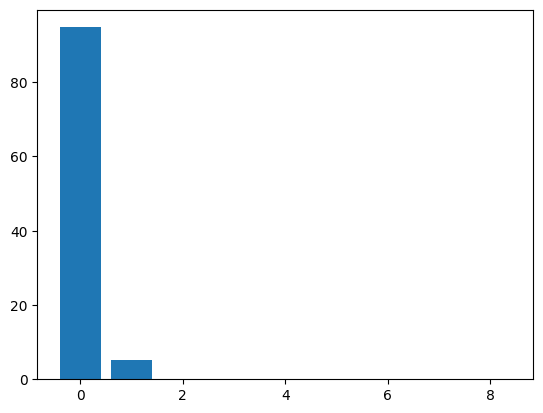

In [5]:
def meaner(column):
    return column-column.mean()
df = df.apply(meaner)
cov_mat = np.cov(df , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
df_reduced = np.dot(eigenvector_subset.transpose(),df.transpose()).transpose()
df_reduced = pd.DataFrame(df_reduced , columns = ['PC1','PC2'])
eigen_values_total = sum(eigen_values)
explained_variance = [(i / eigen_values_total)*100 for i in sorted_eigenvalue]
print(explained_variance)
plt.bar(range(9),explained_variance)
plt.show

In [6]:
def random_centroid(X,k):
    random_idx=[np.random.randint(len(X)) for i in range(k)]
    centroids=[]
    for i in random_idx:
        centroids.append(X.iloc[i])
    return centroids

In [13]:
def assign_cluster(X, initial_centroids, k, elbow):
    clusters = []
    elbows = []
    for i in range(len(X)):
        euclidean_distances = []
        for j in range(k):
            euclidean_distances.append(np.linalg.norm(np.array(X.iloc[i]) - initial_centroids[j]))
        index = np.argmin(euclidean_distances)
        clusters.append(index)
        if elbow==True :
            elbows.append(np.min(euclidean_distances))
    if elbow==True :
        return np.sum(elbows)
    return np.asarray(clusters)

In [8]:
def compute_centroid(X,clusters,k):
    centroid=[]
    for i in range(k):
        temp=[]
        for j in range(len(X)):
            if clusters[j]==i:
                temp.append(X.iloc[j])
        centroid.append(np.mean(temp,axis=0))
    return np.asarray(centroid)

In [9]:
def difference(prev,next):
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-next[i])
    return diff

In [10]:
def show_clusters(X,clusters,centroids,initial_centroids,mark_centroid=True,show_ini_centroid=True,show_plots=True):
    cols={0:'r',1:'g',2:'b',3:'coral',4:'pink',5:'beige'}
    fig,ax=plt.subplots(figsize=(7.5,6))
    for i in range(len(clusters)):
        ax.scatter(X.iloc[i][0],X.iloc[i][1],color=cols[clusters[i]])
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
        if show_ini_centroid==True:
            ax.scatter(initial_centroids[j][0],initial_centroids[j][1],marker='+',s=150,color=cols[j])
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[j][0],centroids[j][1]),0.4,linewidth=2,fill=False))
            if show_ini_centroid==True:
                ax.add_artist(plt.Circle((initial_centroids[j][0],initial_centroids[j][1]), 0.4, linewidth=2,color='y', fill=False))
    ax.set_xlabel("PCA1")
    ax.set_ylabel("PCA2")
    if show_plots==True:
        plt.show()

In [11]:
def kmeans(X,k,show_plots):
    elbow=0
    c_prev=random_centroid(X,k)
    cluster=assign_cluster(X,c_prev,k,False)
    ini_centroid=c_prev
    diff=100
    while diff>0.001:
        cluster=assign_cluster(X,c_prev,k,False)
        c_new=compute_centroid(X,cluster,k)
        diff=difference(c_prev,c_new)
        c_prev=c_new
    c_new = compute_centroid (X, cluster,k)
    elbowx=assign_cluster(X,c_prev,k,True)
    elbow += elbowx
    if show_plots:
        print("\nInitial cluster Centers: \n")
        print(ini_centroid)
        print("\nFinal Cluster Centers: \n")
        print(c_prev)
        #Plotting the final plot
        print("\n\nFinal Plot: \n")
        show_clusters (X, cluster,c_prev,ini_centroid,mark_centroid=True, show_ini_centroid=True)
        return cluster,c_prev
    return elbow

In [15]:
elbow=[]
for i in range(1,10):
    if i != 0:
        elbow.append(kmeans(df_reduced,i,False))
print(elbow)

[3285101.8105591405, 1754389.3884185443, 1361108.474959996, 1088987.7694868373, 914324.9217535232, 742298.5893312424, 667761.6079270148, 647060.3568593636, 634227.6293522792]


[0 1 2 3 7 8 6 5 4]
[3.24575192e+08 5.51006595e+07 1.28859848e+07 4.89338086e+06
 2.13855802e+06 1.31181045e+06 1.31181045e+06 6.06754548e+05
 6.34426665e+03]


<function matplotlib.pyplot.show(close=None, block=None)>

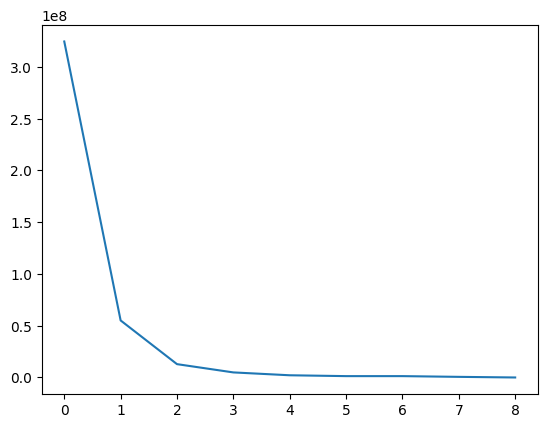

In [ ]:
elbow_index=np.argsort(elbow)[::-1]
print(elbow_index)
elbownp=np.array(elbow)
elbow_sorted=elbownp[elbow_index]
print(elbow_sorted)
plt.plot(range(9),elbow_sorted)
plt.show


Initial cluster Centers: 

[PC1   -14652.414826
PC2      867.789378
Name: 3, dtype: float64, PC1   -19185.280212
PC2     2069.925314
Name: 136, dtype: float64]

Final Cluster Centers: 

[[ 45191.33869465   1491.99905887]
 [-10712.02102392   -353.65903618]]


Final Plot: 



C:\Users\Shaurya\AppData\Local\Temp\ipykernel_23840\1452274931.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(X.iloc[i][0],X.iloc[i][1],color=cols[clusters[i]])
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_23840\1452274931.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(initial_centroids[j][0],initial_centroids[j][1],marker='+',s=150,color=cols[j])
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_23840\1452274931.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

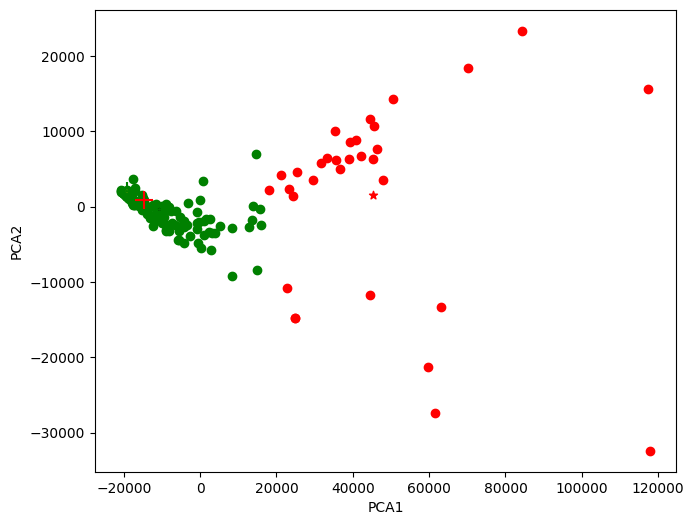

[1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1] [[ 45191.33869465   1491.99905887]
 [-10712.02102392   -353.65903618]]
For n_clusters = 2 The average silhouette_score is : 0.725640624018418


In [ ]:
cluster,cigga=kmeans(df_reduced,2,True)
print(cluster,cigga)
silhouette_avg = silhouette_score(df_reduced, cluster)
print("For n_clusters =",2,"The average silhouette_score is :",silhouette_avg,)